In [1]:
### Diversity analysis ###
# wt

# "estimateAbundance" function infers a complete clonal abundance distribution.
# "alphaDiversity" function generate a smooth diversity (D) curve is generated over a range of diversity orders (q).
# also test the diverstiy (D) at a fixed diversity order (q).

# Load required packages
library(alakazam)
library(dplyr)
library(scales)
library(ggplot2)

db <- readChangeoDb("../../changeo_10x/filtered_contig_heavy_germ-pass.tsv", select = NULL, drop = NULL, seq_upper = TRUE)

Loading required package: ggplot2

As of v1.0.0 the AIRR Rearrangement schema is now the default file format.
A description of the standard is available at https://docs.airr-community.org.
The legacy Change-O format is supported through arguments to each function
that allow the input column names to be explicitly defined.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Partitions the data based on the sample column
clones <- countClones(db, group= "c_call", clone="clone_id")
head(clones, 5)

c_call,clone_id,seq_count,seq_freq
<chr>,<chr>,<int>,<dbl>
IGHM,186_2892,3,0.0008733624
IGHM,2847_41,3,0.0008733624
IGHA,951_448,2,0.1538461538
IGHM,1013_2199,2,0.0005822416
IGHM,1413_717,2,0.0005822416


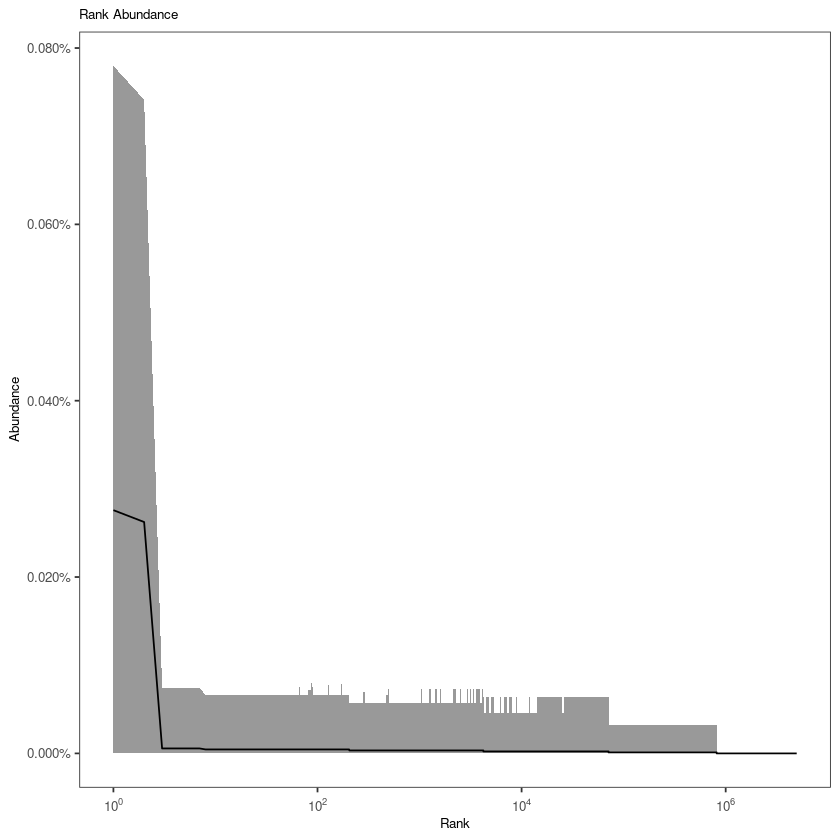

In [5]:
# Partitions the data on the sample column
# Calculates a 95% confidence interval via 200 bootstrap realizations
curve <- estimateAbundance(clones, ci=0.95, nboot=200, clone="clone_id")

# Plots a rank abundance curve of the relative clonal abundances
plot(curve, legend_title="Sample")

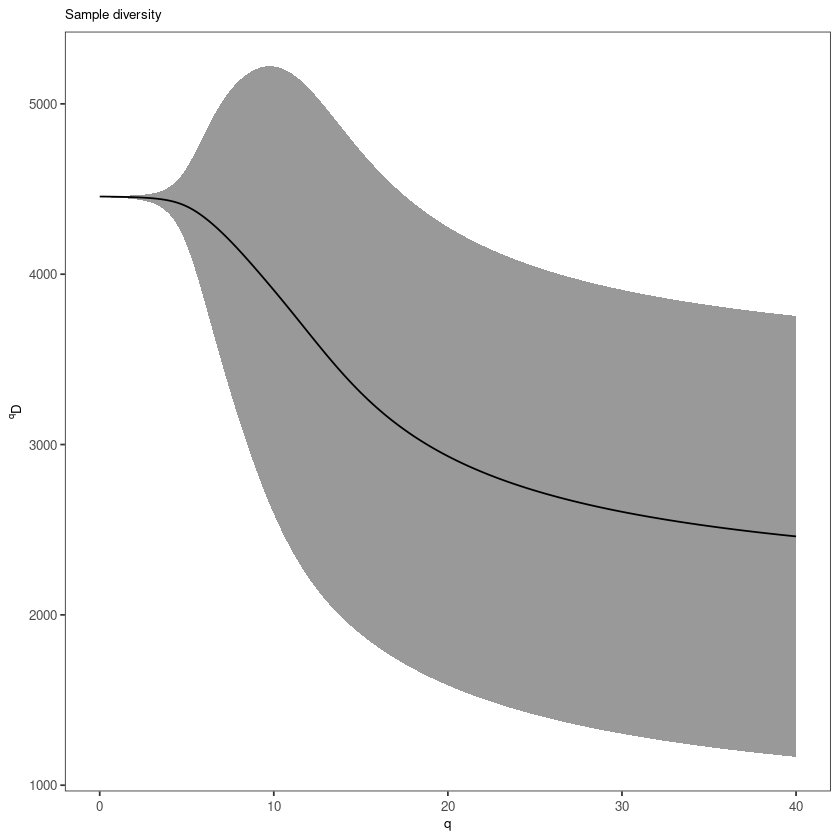

In [6]:
### Generating a diversity curve based on either samples or isotypes.

# 1. Using samples.
# Compare diversity curve across values in the "sample" column
# q ranges from 0 (min_q=0) to 4 (max_q=4) in 0.05 increments (step_q=0.05)
# A 95% confidence interval will be calculated (ci=0.95)
# 200 resampling realizations are performed (nboot=200)
sample_curve <- alphaDiversity(clones, clone="clone_id",
                               min_q=0, max_q=40, step_q=0.1,
                               ci=0.95, nboot=200)

# Plot a log-log (log_q=TRUE, log_d=TRUE) plot of sample diversity
# Indicate number of sequences resampled from each group in the title
sample_main <- paste0("Sample diversity")
sample_colors <- c("r"="deeppink1", "wt"="black")
plot(sample_curve, colors=sample_colors, main_title=sample_main, 
     legend_title="Sample")

In [8]:
# Test diversity at q=0, q=1 and q=2 (equivalent to species richness, Shannon entropy, 
# Simpson's index) across values in the sample_id column
# 200 bootstrap realizations are performed (nboot=200)
isotype_test <- alphaDiversity(clones, group=("c_call"), min_q=0, max_q=4, step_q=1, nboot=200, clone="clone_id")

# Print P-value table
print(isotype_test@tests)

Warning message in estimateAbundance(data, ci = 0.95, ...):
“Not all groups passed threshold min_n=30. Excluded: IGHA, IGHG1, IGHG2B, IGHG2C, IGHG3, NA”


ERROR: Error in if (f2 > 0) {: missing value where TRUE/FALSE needed


Warning message in estimateAbundance(data, ci = 0.95, ...):
“Not all groups passed threshold min_n=30. Excluded: IGHA, IGHG1, IGHG2B, IGHG2C, IGHG3, NA”


ERROR: Error in if (f2 > 0) {: missing value where TRUE/FALSE needed
